<a href="https://colab.research.google.com/github/delhilife/HELLO-WORLD/blob/master/Pyspark_first_e_g.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install pyspark

Installation of spark on google collab
https://towardsdatascience.com/pyspark-in-google-colab-6821c2faf41c

In [0]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://www.apache.org/dist/spark/spark-2.4.3/spark-2.4.3-bin-hadoop2.7.tgz
!tar xf spark-2.4.3-bin-hadoop2.7.tgz
!pip install -q findspark

In [0]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.3-bin-hadoop2.7"

In [0]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [0]:
from google.colab import files
files.upload()

Saving BostonHousing.csv to BostonHousing.csv


{'BostonHousing.csv': b'"crim","zn","indus","chas","nox","rm","age","dis","rad","tax","ptratio","b","lstat","medv"\n0.00632,18,2.31,"0",0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24\n0.02731,0,7.07,"0",0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6\n0.02729,0,7.07,"0",0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7\n0.03237,0,2.18,"0",0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4\n0.06905,0,2.18,"0",0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2\n0.02985,0,2.18,"0",0.458,6.43,58.7,6.0622,3,222,18.7,394.12,5.21,28.7\n0.08829,12.5,7.87,"0",0.524,6.012,66.6,5.5605,5,311,15.2,395.6,12.43,22.9\n0.14455,12.5,7.87,"0",0.524,6.172,96.1,5.9505,5,311,15.2,396.9,19.15,27.1\n0.21124,12.5,7.87,"0",0.524,5.631,100,6.0821,5,311,15.2,386.63,29.93,16.5\n0.17004,12.5,7.87,"0",0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.1,18.9\n0.22489,12.5,7.87,"0",0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15\n0.11747,12.5,7.87,"0",0.524,6.009,82.9,6.2267,5,311,15.2,396.9,13.27,18.9\n0.09378,12

In [0]:
!ls

BostonHousing.csv	   spark-2.4.3-bin-hadoop2.7.tgz
sample_data		   spark-2.4.3-bin-hadoop2.7.tgz.1
spark-2.4.3-bin-hadoop2.7  spark-2.4.3-bin-hadoop2.7.tgz.2


In [0]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression

In [0]:
dataset = spark.read.csv('BostonHousing.csv',inferSchema=True, header =True)

In [0]:
dataset.printSchema()

root
 |-- crim: double (nullable = true)
 |-- zn: double (nullable = true)
 |-- indus: double (nullable = true)
 |-- chas: integer (nullable = true)
 |-- nox: double (nullable = true)
 |-- rm: double (nullable = true)
 |-- age: double (nullable = true)
 |-- dis: double (nullable = true)
 |-- rad: integer (nullable = true)
 |-- tax: integer (nullable = true)
 |-- ptratio: double (nullable = true)
 |-- b: double (nullable = true)
 |-- lstat: double (nullable = true)
 |-- medv: double (nullable = true)



In [0]:
#Input all the features in one vector column
assembler = VectorAssembler(inputCols=['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat'], outputCol = 'Attributes')
output = assembler.transform(dataset)
#Input vs Output
finalized_data = output.select("Attributes","medv")
finalized_data.show()

+--------------------+----+
|          Attributes|medv|
+--------------------+----+
|[0.00632,18.0,2.3...|24.0|
|[0.02731,0.0,7.07...|21.6|
|[0.02729,0.0,7.07...|34.7|
|[0.03237,0.0,2.18...|33.4|
|[0.06905,0.0,2.18...|36.2|
|[0.02985,0.0,2.18...|28.7|
|[0.08829,12.5,7.8...|22.9|
|[0.14455,12.5,7.8...|27.1|
|[0.21124,12.5,7.8...|16.5|
|[0.17004,12.5,7.8...|18.9|
|[0.22489,12.5,7.8...|15.0|
|[0.11747,12.5,7.8...|18.9|
|[0.09378,12.5,7.8...|21.7|
|[0.62976,0.0,8.14...|20.4|
|[0.63796,0.0,8.14...|18.2|
|[0.62739,0.0,8.14...|19.9|
|[1.05393,0.0,8.14...|23.1|
|[0.7842,0.0,8.14,...|17.5|
|[0.80271,0.0,8.14...|20.2|
|[0.7258,0.0,8.14,...|18.2|
+--------------------+----+
only showing top 20 rows



In [0]:
#Input all the features in one vector column
assembler = VectorAssembler(inputCols=['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat'], outputCol = 'Attributes')
output = assembler.transform(dataset)
#Input vs Output
finalized_data = output.select("Attributes","medv")
finalized_data.show()

+--------------------+----+
|          Attributes|medv|
+--------------------+----+
|[0.00632,18.0,2.3...|24.0|
|[0.02731,0.0,7.07...|21.6|
|[0.02729,0.0,7.07...|34.7|
|[0.03237,0.0,2.18...|33.4|
|[0.06905,0.0,2.18...|36.2|
|[0.02985,0.0,2.18...|28.7|
|[0.08829,12.5,7.8...|22.9|
|[0.14455,12.5,7.8...|27.1|
|[0.21124,12.5,7.8...|16.5|
|[0.17004,12.5,7.8...|18.9|
|[0.22489,12.5,7.8...|15.0|
|[0.11747,12.5,7.8...|18.9|
|[0.09378,12.5,7.8...|21.7|
|[0.62976,0.0,8.14...|20.4|
|[0.63796,0.0,8.14...|18.2|
|[0.62739,0.0,8.14...|19.9|
|[1.05393,0.0,8.14...|23.1|
|[0.7842,0.0,8.14,...|17.5|
|[0.80271,0.0,8.14...|20.2|
|[0.7258,0.0,8.14,...|18.2|
+--------------------+----+
only showing top 20 rows



In [0]:
#Split training and testing data
train_data,test_data = finalized_data.randomSplit([0.8,0.2])
regressor = LinearRegression(featuresCol = 'Attributes', labelCol = 'medv')
#Learn to fit the model from training set
regressor = regressor.fit(train_data)
#To predict the prices on testing set
pred = regressor.evaluate(test_data)
#Predict the model
pred.predictions.show()

+--------------------+----+------------------+
|          Attributes|medv|        prediction|
+--------------------+----+------------------+
|[0.01501,90.0,1.2...|50.0| 43.28122012469895|
|[0.01778,95.0,1.4...|32.9|29.985479751662066|
|[0.01965,80.0,1.7...|20.1|19.864585517881913|
|[0.02009,95.0,2.6...|50.0| 42.49752704279495|
|[0.02187,60.0,2.9...|31.1|31.901755973803354|
|[0.02731,0.0,7.07...|21.6|25.352235126250175|
|[0.03041,0.0,5.19...|18.5|19.372418018284773|
|[0.03113,0.0,4.39...|17.5|16.946694894597325|
|[0.03237,0.0,2.18...|33.4|28.829971416096775|
|[0.03427,0.0,5.19...|19.5|20.196211496301355|
|[0.03551,25.0,4.8...|22.9| 24.98591858666819|
|[0.03578,20.0,3.3...|45.4| 38.90100150887227|
|[0.03932,0.0,3.41...|22.0| 27.54283609961399|
|[0.0459,52.5,5.32...|22.3| 27.04434785015063|
|[0.04932,33.0,2.1...|28.2| 32.31729452773365|
|[0.05083,0.0,5.19...|22.2| 22.23440687657874|
|[0.05479,33.0,2.1...|28.4|30.379307159554124|
|[0.05646,0.0,12.8...|21.2| 21.49346890585499|
|[0.0566,0.0,

In [0]:
#coefficient of the regression model
coeff = regressor.coefficients
#X and Y intercept
intr = regressor.intercept
print ("The coefficient of the model is : %a" %coeff)
print ("The Intercept of the model is : %f" %intr)

The coefficient of the model is : DenseVector([-0.0834, 0.0354, 0.0295, 1.7467, -18.7678, 3.8111, 0.0023, -1.4074, 0.2774, -0.0126, -1.001, 0.0085, -0.5201])
The Intercept of the model is : 37.976788


In [0]:
from pyspark.ml.evaluation import RegressionEvaluator
eval = RegressionEvaluator(labelCol="medv", predictionCol="prediction", metricName="rmse")
# Root Mean Square Error
rmse = eval.evaluate(pred.predictions)
print("RMSE: %.3f" % rmse)
# Mean Square Error
mse = eval.evaluate(pred.predictions, {eval.metricName: "mse"})
print("MSE: %.3f" % mse)
# Mean Absolute Error
mae = eval.evaluate(pred.predictions, {eval.metricName: "mae"})
print("MAE: %.3f" % mae)
# r2 - coefficient of determination
r2 = eval.evaluate(pred.predictions, {eval.metricName: "r2"})
print("r2: %.3f" %r2)

RMSE: 5.434
MSE: 29.524
MAE: 3.526
r2: 0.723


In [40]:
from google.colab import files
files.upload()

Saving ZFI1.csv to ZFI1.csv


{'ZFI1.csv': b'Center of Examination Opted,First Name,Middle Name,Last Name,Category,Mother\'s Name,Father\'s Name,Date of Birth,Age as on 01 September 2020,Permanent address,District,State,Pin Code,Correspondence address,District,State,Pin Code,Email,Landline No. ( preceded by STD Code ),Mobile No,Secondary School Examination ( High School ),Subjects,Year of completion,Division,Percentage,Senior Secondary School Examination ( + 2 ),Subjects,Year of completion,Division,Percentage,Graduation,"If the name of the course is not mentioned above, please specify",Board / University / Institution,Subjects,Year of completion,Division,Percentage,Post Graduation,"If the name of the course is not mentioned above, please specify",Board / University / Institution,Subjects,Year of Completion,Division,Percentage,Other Qualification,Examining Body 1,Exam,Year,Subjects,Result,Percentage,Examining Body 2,Exam,Year,Subjects,Result,Percentage,Examining Body 3,Exam,Year,Subjects,Result,Percentage,Have you a

In [0]:
dataset = spark.read.csv('ZFI1.csv',inferSchema=True, header =True)

In [42]:
dataset.printSchema()

root
 |-- Center of Examination Opted: string (nullable = true)
 |-- First Name: string (nullable = true)
 |-- Middle Name: string (nullable = true)
 |-- Last Name: string (nullable = true)
 |-- Category: string (nullable = true)
 |-- Mother's Name: string (nullable = true)
 |-- Father's Name: string (nullable = true)
 |-- Date of Birth: string (nullable = true)
 |-- Age as on 01 September 2020: string (nullable = true)
 |-- Permanent address: string (nullable = true)
 |-- District10: string (nullable = true)
 |-- State11: string (nullable = true)
 |-- Pin Code12: string (nullable = true)
 |-- Correspondence address: string (nullable = true)
 |-- District14: string (nullable = true)
 |-- State15: string (nullable = true)
 |-- Pin Code16: string (nullable = true)
 |-- Email: string (nullable = true)
 |-- Landline No. ( preceded by STD Code ): string (nullable = true)
 |-- Mobile No: string (nullable = true)
 |-- Secondary School Examination ( High School ): string (nullable = true)
 |--

In [45]:
from pyspark.sql.functions import*
df=dataset.groupBy('Category').count()
df.show()

+--------------------+-----+
|            Category|count|
+--------------------+-----+
|             Kursela|    1|
|64-C/Pocket-D-2 K...|    1|
|danishiqbal1579@g...|    1|
|syedimranmn786@gm...|    1|
|jasirekpodiyad@gm...|    1|
|PLOT NO-3032, AWA...|    1|
|  exams056@gmail.com|    1|
|   fakhan93@yahoo.in|    1|
|PV House, Karukon...|    1|
|trustmealways101@...|    1|
|              670561|    2|
|Rozynisar39@gmail...|    1|
|        Prathma bank|    1|
|                  SC|  192|
|         AT- BAJARDA|    1|
|H NO 1-175 SIRSAP...|    1|
|           Karnataka|    1|
|khan.saqibsarwar@...|    1|
|shahidraza7786@gm...|    1|
|     history-.civics|    1|
+--------------------+-----+
only showing top 20 rows



In [0]:
from pyspark.context import SparkContext
from pyspark.sql.context import SQLContext
from pyspark.sql.session import SparkSession
    

# load up other dependencies
import re
import pandas as pd

In [51]:
m = re.finditer(r'.*?(spark).*?', "I'm searching for a spark in PySpark", re.I)
for match in m:
    print(match, match.start(), match.end())

<_sre.SRE_Match object; span=(0, 25), match="I'm searching for a spark"> 0 25
<_sre.SRE_Match object; span=(25, 36), match=' in PySpark'> 25 36


In [53]:
files.upload()

Saving NASA_access_log_Jul95.gz to NASA_access_log_Jul95.gz


In [54]:
import glob

raw_data_files = glob.glob('*.gz')
raw_data_files

['NASA_access_log_Jul95.gz']

In [55]:
base_df = spark.read.text(raw_data_files)
base_df.printSchema()
root

root
 |-- value: string (nullable = true)



NameError: ignored

In [56]:
base_df = spark.read.text(raw_data_files)
base_df.printSchema()

root
 |-- value: string (nullable = true)



In [57]:
type(base_df)

pyspark.sql.dataframe.DataFrame

In [58]:
base_df_rdd = base_df.rdd
type(base_df_rdd)

pyspark.rdd.RDD

In [59]:
base_df.show(10, truncate=False)

+-----------------------------------------------------------------------------------------------------------------------+
|value                                                                                                                  |
+-----------------------------------------------------------------------------------------------------------------------+
|199.72.81.55 - - [01/Jul/1995:00:00:01 -0400] "GET /history/apollo/ HTTP/1.0" 200 6245                                 |
|unicomp6.unicomp.net - - [01/Jul/1995:00:00:06 -0400] "GET /shuttle/countdown/ HTTP/1.0" 200 3985                      |
|199.120.110.21 - - [01/Jul/1995:00:00:09 -0400] "GET /shuttle/missions/sts-73/mission-sts-73.html HTTP/1.0" 200 4085   |
|burger.letters.com - - [01/Jul/1995:00:00:11 -0400] "GET /shuttle/countdown/liftoff.html HTTP/1.0" 304 0               |
|199.120.110.21 - - [01/Jul/1995:00:00:11 -0400] "GET /shuttle/missions/sts-73/sts-73-patch-small.gif HTTP/1.0" 200 4179|
|burger.letters.com - - 

In [60]:
print((base_df.count(), len(base_df.columns)))

(1891715, 1)


In [61]:
sample_logs = [item['value'] for item in base_df.take(15)]
sample_logs

['199.72.81.55 - - [01/Jul/1995:00:00:01 -0400] "GET /history/apollo/ HTTP/1.0" 200 6245',
 'unicomp6.unicomp.net - - [01/Jul/1995:00:00:06 -0400] "GET /shuttle/countdown/ HTTP/1.0" 200 3985',
 '199.120.110.21 - - [01/Jul/1995:00:00:09 -0400] "GET /shuttle/missions/sts-73/mission-sts-73.html HTTP/1.0" 200 4085',
 'burger.letters.com - - [01/Jul/1995:00:00:11 -0400] "GET /shuttle/countdown/liftoff.html HTTP/1.0" 304 0',
 '199.120.110.21 - - [01/Jul/1995:00:00:11 -0400] "GET /shuttle/missions/sts-73/sts-73-patch-small.gif HTTP/1.0" 200 4179',
 'burger.letters.com - - [01/Jul/1995:00:00:12 -0400] "GET /images/NASA-logosmall.gif HTTP/1.0" 304 0',
 'burger.letters.com - - [01/Jul/1995:00:00:12 -0400] "GET /shuttle/countdown/video/livevideo.gif HTTP/1.0" 200 0',
 '205.212.115.106 - - [01/Jul/1995:00:00:12 -0400] "GET /shuttle/countdown/countdown.html HTTP/1.0" 200 3985',
 'd104.aa.net - - [01/Jul/1995:00:00:13 -0400] "GET /shuttle/countdown/ HTTP/1.0" 200 3985',
 '129.94.144.152 - - [01/Jul/

In [64]:
host_pattern = r'(^\S+\.[\S+\.]+\S+)\s'
hosts = [re.search(host_pattern, item).group(1)
           if re.search(host_pattern, item)
           else 'no match'
           for item in sample_logs]
hosts

['199.72.81.55',
 'unicomp6.unicomp.net',
 '199.120.110.21',
 'burger.letters.com',
 '199.120.110.21',
 'burger.letters.com',
 'burger.letters.com',
 '205.212.115.106',
 'd104.aa.net',
 '129.94.144.152',
 'unicomp6.unicomp.net',
 'unicomp6.unicomp.net',
 'unicomp6.unicomp.net',
 'd104.aa.net',
 'd104.aa.net']

In [65]:
ts_pattern = r'\[(\d{2}/\w{3}/\d{4}:\d{2}:\d{2}:\d{2} -\d{4})]'
timestamps = [re.search(ts_pattern, item).group(1) for item in sample_logs]
timestamps

['01/Jul/1995:00:00:01 -0400',
 '01/Jul/1995:00:00:06 -0400',
 '01/Jul/1995:00:00:09 -0400',
 '01/Jul/1995:00:00:11 -0400',
 '01/Jul/1995:00:00:11 -0400',
 '01/Jul/1995:00:00:12 -0400',
 '01/Jul/1995:00:00:12 -0400',
 '01/Jul/1995:00:00:12 -0400',
 '01/Jul/1995:00:00:13 -0400',
 '01/Jul/1995:00:00:13 -0400',
 '01/Jul/1995:00:00:14 -0400',
 '01/Jul/1995:00:00:14 -0400',
 '01/Jul/1995:00:00:14 -0400',
 '01/Jul/1995:00:00:15 -0400',
 '01/Jul/1995:00:00:15 -0400']

In [66]:
method_uri_protocol_pattern = r'\"(\S+)\s(\S+)\s*(\S*)\"'
method_uri_protocol = [re.search(method_uri_protocol_pattern, item).groups()
               if re.search(method_uri_protocol_pattern, item)
               else 'no match'
              for item in sample_logs]
method_uri_protocol

[('GET', '/history/apollo/', 'HTTP/1.0'),
 ('GET', '/shuttle/countdown/', 'HTTP/1.0'),
 ('GET', '/shuttle/missions/sts-73/mission-sts-73.html', 'HTTP/1.0'),
 ('GET', '/shuttle/countdown/liftoff.html', 'HTTP/1.0'),
 ('GET', '/shuttle/missions/sts-73/sts-73-patch-small.gif', 'HTTP/1.0'),
 ('GET', '/images/NASA-logosmall.gif', 'HTTP/1.0'),
 ('GET', '/shuttle/countdown/video/livevideo.gif', 'HTTP/1.0'),
 ('GET', '/shuttle/countdown/countdown.html', 'HTTP/1.0'),
 ('GET', '/shuttle/countdown/', 'HTTP/1.0'),
 ('GET', '/', 'HTTP/1.0'),
 ('GET', '/shuttle/countdown/count.gif', 'HTTP/1.0'),
 ('GET', '/images/NASA-logosmall.gif', 'HTTP/1.0'),
 ('GET', '/images/KSC-logosmall.gif', 'HTTP/1.0'),
 ('GET', '/shuttle/countdown/count.gif', 'HTTP/1.0'),
 ('GET', '/images/NASA-logosmall.gif', 'HTTP/1.0')]

In [67]:
status_pattern = r'\s(\d{3})\s'
status = [re.search(status_pattern, item).group(1) for item in sample_logs]
print(status)

['200', '200', '200', '304', '200', '304', '200', '200', '200', '200', '200', '200', '200', '200', '200']


In [68]:
content_size_pattern = r'\s(\d+)$'
content_size = [re.search(content_size_pattern, item).group(1) for item in sample_logs]
print(content_size)

['6245', '3985', '4085', '0', '4179', '0', '0', '3985', '3985', '7074', '40310', '786', '1204', '40310', '786']


In [69]:
from pyspark.sql.functions import regexp_extract

logs_df = base_df.select(regexp_extract('value', host_pattern, 1).alias('host'),
                         regexp_extract('value', ts_pattern, 1).alias('timestamp'),
                         regexp_extract('value', method_uri_protocol_pattern, 1).alias('method'),
                         regexp_extract('value', method_uri_protocol_pattern, 2).alias('endpoint'),
                         regexp_extract('value', method_uri_protocol_pattern, 3).alias('protocol'),
                         regexp_extract('value', status_pattern, 1).cast('integer').alias('status'),
                         regexp_extract('value', content_size_pattern, 1).cast('integer').alias('content_size'))
logs_df.show(10, truncate=True)
print((logs_df.count(), len(logs_df.columns)))

+--------------------+--------------------+------+--------------------+--------+------+------------+
|                host|           timestamp|method|            endpoint|protocol|status|content_size|
+--------------------+--------------------+------+--------------------+--------+------+------------+
|        199.72.81.55|01/Jul/1995:00:00...|   GET|    /history/apollo/|HTTP/1.0|   200|        6245|
|unicomp6.unicomp.net|01/Jul/1995:00:00...|   GET| /shuttle/countdown/|HTTP/1.0|   200|        3985|
|      199.120.110.21|01/Jul/1995:00:00...|   GET|/shuttle/missions...|HTTP/1.0|   200|        4085|
|  burger.letters.com|01/Jul/1995:00:00...|   GET|/shuttle/countdow...|HTTP/1.0|   304|           0|
|      199.120.110.21|01/Jul/1995:00:00...|   GET|/shuttle/missions...|HTTP/1.0|   200|        4179|
|  burger.letters.com|01/Jul/1995:00:00...|   GET|/images/NASA-logo...|HTTP/1.0|   304|           0|
|  burger.letters.com|01/Jul/1995:00:00...|   GET|/shuttle/countdow...|HTTP/1.0|   200|    

In [70]:
from pyspark.sql.functions import col
from pyspark.sql.functions import sum as spark_sum

def count_null(col_name):
    return spark_sum(col(col_name).isNull().cast('integer')).alias(col_name)

# Build up a list of column expressions, one per column.
exprs = [count_null(col_name) for col_name in logs_df.columns]

# Run the aggregation. The *exprs converts the list of expressions into
# variable function arguments.
logs_df.agg(*exprs).show()

+----+---------+------+--------+--------+------+------------+
|host|timestamp|method|endpoint|protocol|status|content_size|
+----+---------+------+--------+--------+------+------------+
|   0|        0|     0|       0|       0|     1|       19727|
+----+---------+------+--------+--------+------+------------+



LOG DATA VISUALIZATION N ANALYSIS...RAN SUCCESSFULLY
https://opensource.com/article/19/5/visualize-log-data-apache-spark

In [71]:
content_size_summary_df = logs_df.describe(['content_size'])
content_size_summary_df.toPandas()

,summary,content_size
0,count,1871988
1,mean,20671.058516934936
2,stddev,77333.01826442246
3,min,0
4,max,6823936


In [73]:
from pyspark.sql import functions as F

(logs_df.agg(F.min(logs_df['content_size']).alias('min_content_size'),
             F.max(logs_df['content_size']).alias('max_content_size'),
             F.mean(logs_df['content_size']).alias('mean_content_size'),
             F.stddev(logs_df['content_size']).alias('std_content_size'),
             F.count(logs_df['content_size']).alias('count_content_size'))
        .toPandas())



,min_content_size,max_content_size,mean_content_size,std_content_size,count_content_size
0,0,6823936,20671.058517,77333.018264,1871988


In [74]:
status_freq_df = (logs_df
                     .groupBy('status')
                     .count()
                     .sort('status')
                     .cache())
print('Total distinct HTTP Status Codes:', status_freq_df.count())   

Total distinct HTTP Status Codes: 9


In [75]:
status_freq_pd_df = (status_freq_df
                         .toPandas()
                         .sort_values(by=['count'],
                                      ascending=False))
status_freq_pd_df

,status,count
1,200.0,1701536
3,304.0,132627
2,302.0,46573
6,404.0,10843
7,500.0,62
5,403.0,54
8,501.0,14
4,400.0,5
0,NaN,1


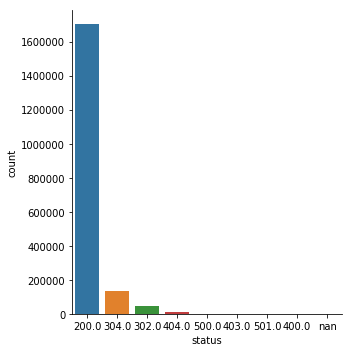

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

sns.catplot(x='status', y='count', data=status_freq_pd_df, 
            kind='bar', order=status_freq_pd_df['status'])

In [77]:
log_freq_df = status_freq_df.withColumn('log(count)', 
                                        F.log(status_freq_df['count']))
log_freq_df.show()

+------+-------+------------------+
|status|  count|        log(count)|
+------+-------+------------------+
|  null|      1|               0.0|
|   200|1701536|14.347041930501215|
|   302|  46573| 10.74877625305556|
|   304| 132627|11.795295955915682|
|   400|      5|1.6094379124341003|
|   403|     54|3.9889840465642745|
|   404|  10843| 9.291274989472182|
|   500|     62| 4.127134385045092|
|   501|     14|2.6390573296152584|
+------+-------+------------------+



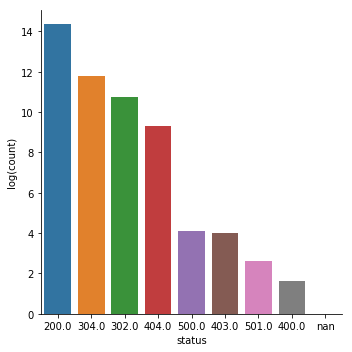

In [78]:
log_freq_pd_df = (log_freq_df
                    .toPandas()
                    .sort_values(by=['log(count)'],
                                 ascending=False))
sns.catplot(x='status', y='log(count)', data=log_freq_pd_df, 
            kind='bar', order=status_freq_pd_df['status'])